In [4]:
#%qtconsole
import pickle
import os
import matplotlib.pyplot as plt

In [5]:
results = []
for filename in os.listdir("results/"):
    with open("results/" + filename, 'rb') as f:
        results.append(pickle.load(f))

In [6]:
# print final validation accuracy for each number_of_keys_per_class
keys = []
val_acc = []
acc = []
loss = []
val_loss = []
for i in range(len(results)):
    n_keys = 50 + 50*i
    keys.append(n_keys)
    val_acc_i = results[i][0][-1]
    val_acc.append(val_acc_i)
    acc_i = results[i][1][-1]
    acc.append(acc_i)
    loss_i = results[i][2][-1]
    loss.append(loss_i)
    val_loss_i = results[i][3][-1]
    val_loss.append(val_loss_i)

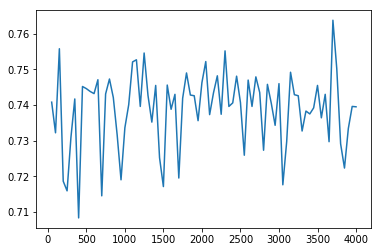

In [7]:
plt.plot(keys, val_acc)

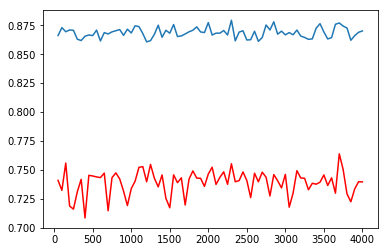

In [14]:
plt.plot(keys, acc)
plt.plot(keys, val_acc, c='r')

/Users/Friedi/anaconda3/envs/studyenv/lib/python3.6/site-packages/matplotlib/legend.py:449: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


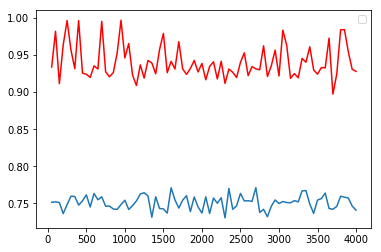

In [18]:
plt.plot(keys, loss)
plt.plot(keys, val_loss, c='r')

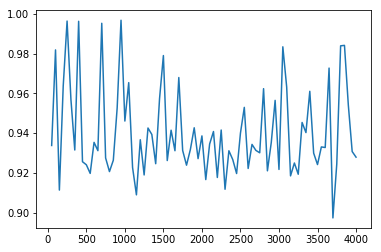

In [10]:
plt.plot(keys, val_loss)